# Kaggle タイタニック

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データの読み込み

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

---

## データ加工

---

### データの概要を確認

In [3]:
# trainの先頭を表示

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# データ数

print(f'train : {len(train)}')
print(f'test : {len(test)}')

train : 891
test : 418


In [5]:
# データの統計量

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

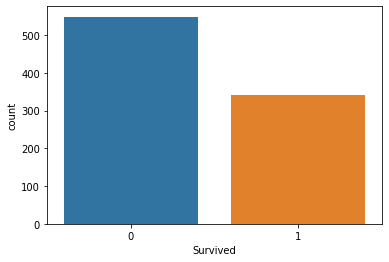

In [6]:
# 全体の生存者、死亡者数

sns.countplot(data=train, x='Survived')

---

### 欠損値の確認と補完

In [7]:
# 欠損値を確認

print(train.isnull().sum())
print('-----------------------')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-----------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
train.groupby('Embarked').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,74820,93,317,4005.92,65,61,10072.2962
Q,32178,30,224,786.50,33,13,1022.2543
S,289496,217,1514,16312.75,368,266,17439.3988


In [9]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [10]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [11]:
# 欠損値の補完

# Sの人が一番多いので欠損値もSにしておく
train['Embarked'] = train['Embarked'].fillna('S')

# 年齢は平均値で補完
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

# Pclass3の人だったのでその平均値で補完
test['Fare'].fillna(train.groupby('Pclass').mean()['Fare'][3], inplace=True)

In [12]:
# 欠損値をもう一度確認

print(train.isnull().sum())
print('-----------------------')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
-----------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


---

### ここから上手く加工する

- SibSpとParchを足して家族の人数を計算
- 子供(10歳未満)かどうかを利用
- Pclassをそのまま使うと数字の大小で悪影響がありそうなのでダミー変数化
- Sex、Embarkedをダミー変数化
- Name、Ticket、Cabinは使わない

In [14]:
# 家族の数を計算

train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

<AxesSubplot:xlabel='Family', ylabel='count'>

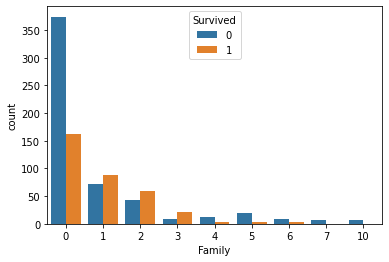

In [15]:
# 家族の数と生存者、死亡者数

sns.countplot(data=train, x='Family', hue='Survived')

**↑家族の数と生存率には関係がありそう**

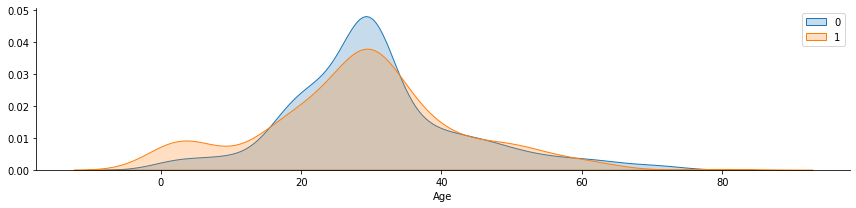

In [16]:
# 年齢と生存者、死亡者数

sns.FacetGrid(data=train, hue='Survived', aspect=4).map(sns.kdeplot, 'Age', shade=True)
plt.legend()

**↑子供の生存率が高い**

In [17]:
# 子供の生存率が高いことを利用する

train['Child'] = 0
test['Child'] = 0
train.loc[train['Age'] < 10, 'Child'] = 1
test.loc[test['Age'] < 10, 'Child'] = 1

In [18]:
# ダミー変数化

train['Pclass'] = train['Pclass'].astype(np.str)
test['Pclass'] = test['Pclass'].astype(np.str)

train_dummies = pd.get_dummies(train[['Pclass', 'Sex', 'Embarked']])
test_dummies = pd.get_dummies(test[['Pclass', 'Sex', 'Embarked']])

train_dummies

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1
887,1,0,0,1,0,0,0,1
888,0,0,1,1,0,0,0,1
889,1,0,0,0,1,1,0,0


In [19]:
# 必要なデータのみにする

train = pd.concat([train, train_dummies], axis=1)
test = pd.concat([test, test_dummies], axis=1)

train = train.drop(columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])
test = test.drop(columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])

train.head()

,PassengerId,Survived,Fare,Family,Child,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,71.2833,1,0,1,0,0,1,0,1,0,0
2,3,1,7.9250,0,0,0,0,1,1,0,0,0,1
3,4,1,53.1000,1,0,1,0,0,1,0,0,0,1
4,5,0,8.0500,0,0,0,0,1,0,1,0,0,1


In [20]:
test.head()

,PassengerId,Fare,Family,Child,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,7.8292,0,0,0,0,1,0,1,0,1,0
1,893,7.0000,1,0,0,0,1,1,0,0,0,1
2,894,9.6875,0,0,0,1,0,0,1,0,1,0
3,895,8.6625,0,0,0,0,1,0,1,0,0,1
4,896,12.2875,2,0,0,0,1,1,0,0,0,1


In [21]:
# 学習用に加工

x_train = train.drop(columns=['PassengerId', 'Survived']).values
x_test = test.drop(columns=['PassengerId']).values
y_train = train['Survived'].values

---

## 学習

In [185]:
# XGboost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=4, learning_rate=0.01, n_estimators=100)
xgb.fit(x_train, y_train)

predict = xgb.predict(x_test)

xgb.score(x_train, y_train)

0.8383838383838383

In [148]:
# 提出用のcsvファイルを出力

submission_csv = pd.concat([test['PassengerId'], pd.Series(predict)], axis=1)
submission_csv.columns = ['PassengerId', 'Survived']
submission_csv.to_csv('submission.csv', index=False)